# Metody Obliczeniowe w Nauce i Technice
# Laboratorium 7: Dekompozycja spektralna
## Przemysław Roman

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

def time_exec(func, *args):
    start_time = time.time()
    result = func(*args)
    return result, time.time() - start_time

## Zadanie 1

In [3]:
def power_iterations(A, max_iter=10**3, eps=1e-7):
    x_i = np.random.rand(A.shape[1])
    i = 0
    while True:
        x_j = np.dot(A, x_i)
        norm = np.linalg.norm(x_j, np.inf)
        x_j_norm = x_j / norm
        i += 1
        if i >= max_iter or np.linalg.norm(x_j_norm - x_i, np.inf) < eps:
            x_i = x_j_norm
            return np.linalg.norm(x_j, np.inf), x_i/np.linalg.norm(x_i)
        x_i = x_j_norm

In [4]:
np.random.seed(123432)
A = np.array([[1, 5, 2], [1, 2, 3], [3, 4, 1]])

eig_val, eig_vec = np.linalg.eig(A)
print('numpy')
print(eig_val)
print(eig_vec)

eig_val, eig_vec = power_iterations(A)
print('mine')
print(eig_val)
print(eig_vec)

numpy
[ 7.0674301 +0.j         -1.53371505+1.15176646j -1.53371505-1.15176646j]
[[ 0.60911483+0.j          0.63866297+0.j          0.63866297-0.j        ]
 [ 0.48957959+0.j         -0.34138514+0.37732585j -0.34138514-0.37732585j]
 [ 0.62393184+0.j          0.04436786-0.57551933j  0.04436786+0.57551933j]]
mine
7.0674299821556135
[0.60911483 0.4895796  0.62393185]


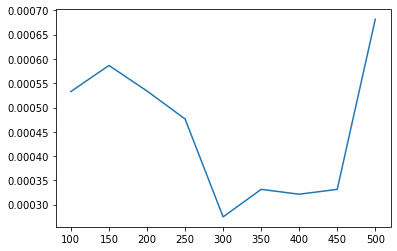

In [15]:
np.random.seed(123432)
I = []
times = []
for i in range(100, 501, 50):
    A = np.random.uniform(size=(i, i))
    res, t = time_exec(power_iterations, A)
    I.append(i)
    times.append(t)

plt.plot(I, times)
plt.show()

## Zadanie 2

In [16]:
# source: https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_EigenProblem1.html

def __find_p(x):
    return np.argwhere(np.isclose(np.abs(x), np.linalg.norm(x, np.inf))).min()

def inverse_power_method(A, tolerance=1e-10, max_iterations=10000):

    n = A.shape[0]
    x = np.ones(n)
    I = np.eye(n)

    q = np.dot(x, np.dot(A, x)) / np.dot(x, x)

    p = __find_p(x)

    error = 1

    x = x / x[p]

    for _ in range(max_iterations):

        if error < tolerance:
            break

        y = np.linalg.solve(A - q * I, x)
        μ = y[p]
        p = __find_p(y)
        error = np.linalg.norm(x - y / y[p],  np.inf)
        x = y / y[p]
        μ = 1. / μ + q


    return (μ, x)

A = np.array([[1, 5, 2], [1, 2, 3], [3, 4, 1]])
inverse_power_method(A)

(7.067430102590308, array([0.97625219, 0.78466838, 1.        ]))